In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys, os
# 
from mnist import load_mnist

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(\
            flatten=True, normalize=False)

In [4]:
x_train.shape

(60000, 784)

In [5]:
t_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 784)

In [7]:
t_train.shape

(60000,)

In [8]:
img = x_train[0]
label = t_train[0]
label

5

In [9]:
img.shape

(784,)

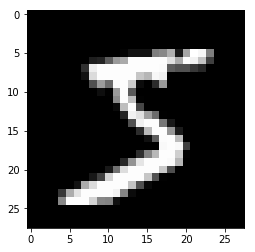

In [10]:
plt.imshow(img.reshape(28,28), cmap="gray")

In [11]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(\
            normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [12]:
import pickle

In [13]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [16]:
def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = x.dot(W1) + b1
    z1 = sigmoid(a1)
    a2 = z1.dot(W2) + b2
    z2 = sigmoid(a2)
    a3 = z2.dot(W3) + b3
    y = softmax(a3)
    
    return y

In [17]:
x, t = get_data()

In [18]:
network = init_network()

In [19]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

float(accuracy_cnt) / len(x)

0.9352

## バッチ処理（ミニバッチ）

In [20]:
batch_size = 100

In [21]:
# ソフトマックス関数（再定義）
def softmax(a):
    if a.ndim == 2:
        x = a.T
        exp_x = np.exp(x - np.max(x, axis=0))
        y = exp_x / np.sum(exp_x, axis=0)
        return y.T 

    exp_a = np.exp(a - np.max(a))
    return exp_a / np.sum(exp_a)

In [22]:
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

float(accuracy_cnt) / len(x)

0.9352